In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Imports and data fetching

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
magic_gamma_telescope = fetch_ucirepo(id=159) 
  
# data (as pandas dataframes) 
DS_feature = magic_gamma_telescope.data.features 
DS_target = magic_gamma_telescope.data.targets 
  
# metadata 
print(magic_gamma_telescope.metadata) 
  
# variable information 
print(magic_gamma_telescope.variables) 



{'uci_id': 159, 'name': 'MAGIC Gamma Telescope', 'repository_url': 'https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope', 'data_url': 'https://archive.ics.uci.edu/static/public/159/data.csv', 'abstract': 'Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 19020, 'num_features': 10, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2004, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C52C8B', 'creators': ['R. Bock'], 'intro_paper': None, 'additional_info': {'summary': "The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamm

### yay

In [4]:
#data exloration
print(DS_feature.describe())

print("-------------------------------------------------------------")

print(DS_target.describe())

            fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000  
mean      -4.331745     10.545545      0.249726     27.645707    193.818026  
std       59.206062     51.000118     20.827439     26

In [5]:
print("Duplicates in features:", DS_feature.duplicated().sum())

# DS_feature = DS_feature.drop_duplicates()


Duplicates in features: 115


In [6]:
col = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']


# --- Missingness handling ---
threshold = 30

missing_pct = DS_feature.isna().mean() * 100
to_drop_cols = missing_pct[missing_pct > threshold ].index.tolist()
to_impute_cols = missing_pct[(missing_pct >= 5) & (missing_pct <= threshold)].index.tolist()

print(f'Missing percentages:\n{missing_pct}')

dropped_cols = []
imputed_cols = []

# drop columns with more than 30% (threshold) missing values
for col in to_drop_cols:
    if col in DS_feature.columns:
        DS_feature = DS_feature.drop(columns=[col])
        dropped_cols.append(col)

# for columns with 5-30% missing -> impute

for col in to_impute_cols:
    if col not in DS_feature.columns:
        continue
    # checks if the column’s dtype is numeric
    if pd.api.types.is_numeric_dtype(DS_feature[col]):
        median_val = DS_feature[col].median(skipna=True)
        # replaces missing values with the median (less sensetive to outliners than mean)
        # inplace=True means the changes are applied directly to the DataFrame
        DS_feature[col].fillna(median_val, inplace=True)
        imputed_cols.append((col, "median", median_val))
    else:
        # for non-numeric, impute with mode if available
        try:
            mode_val = DS_feature[col].mode(dropna=True)
            if len(mode_val) > 0:
                mode_val = mode_val.iloc[0]
                DS_feature[col].fillna(mode_val, inplace=True)
                imputed_cols.append((col, "mode", mode_val))
            else:
                # if no mode, fill with placeholder
                DS_feature[col].fillna("missing", inplace=True)
                imputed_cols.append((col, "placeholder", "missing"))
        except Exception as e:
            DS_feature[col].fillna("missing", inplace=True)
            imputed_cols.append((col, "placeholder", "missing"))

Missing percentages:
fLength     0.0
fWidth      0.0
fSize       0.0
fConc       0.0
fConc1      0.0
fAsym       0.0
fM3Long     0.0
fM3Trans    0.0
fAlpha      0.0
fDist       0.0
dtype: float64


In [7]:
print("Missingness handling summary:")
print(f'Dropped columns (missingness > {threshold}%): {len(dropped_cols)}\n{dropped_cols}')
print(f'Imputed columns (missingness between 5% and {threshold}%): {len(imputed_cols)}\n{imputed_cols}')

Missingness handling summary:
Dropped columns (missingness > 30%): 0
[]
Imputed columns (missingness between 5% and 30%): 0
[]


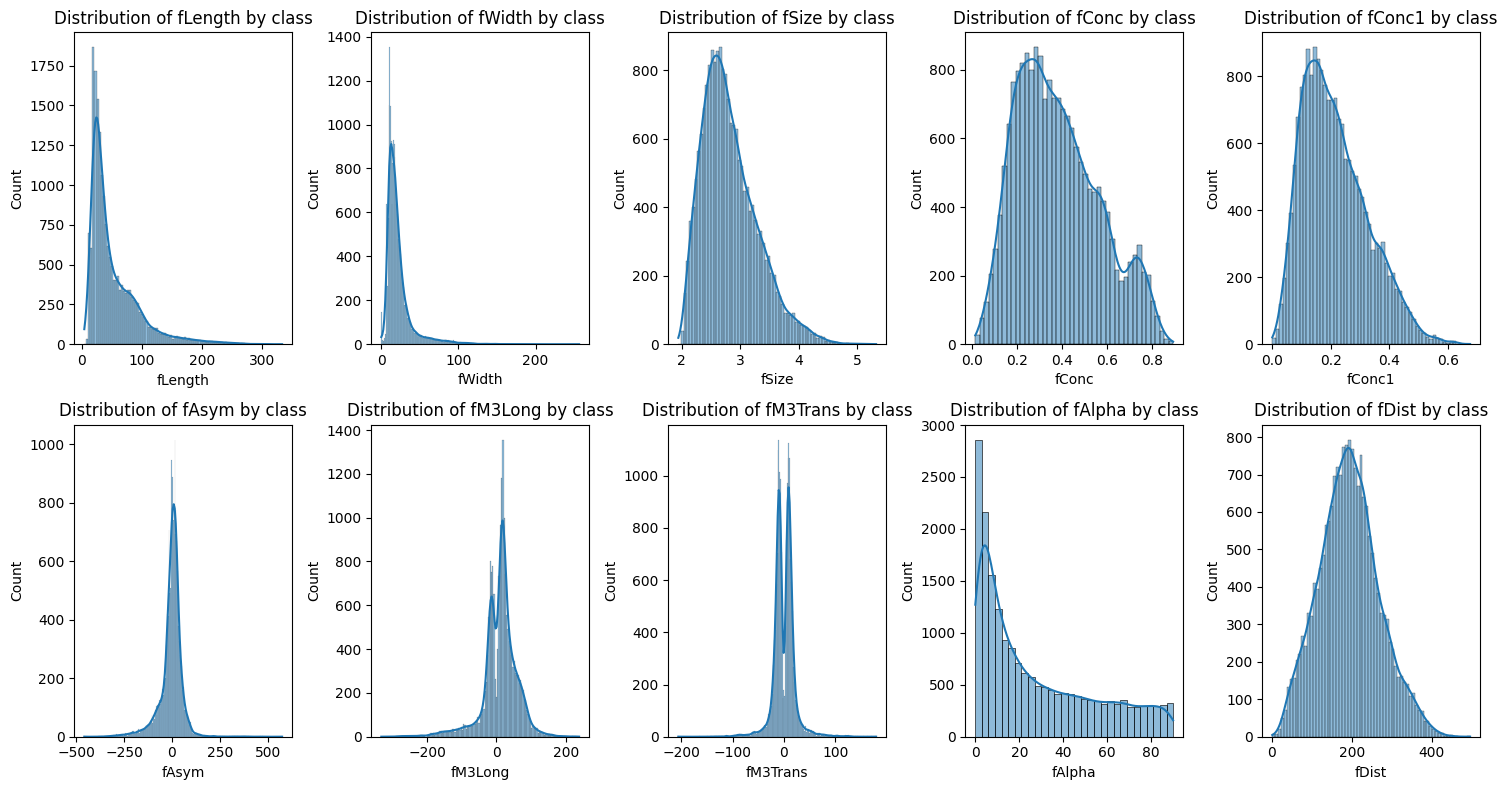

In [8]:
features = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']

fig, axes = plt.subplots(2, 5, figsize=(15,8))

for ax, feature in zip(axes.flatten(), features):
    sns.histplot(DS_feature[feature], kde=True, ax=ax)
    ax.set_title(f"Distribution of {feature} by class")

plt.tight_layout()
plt.show()

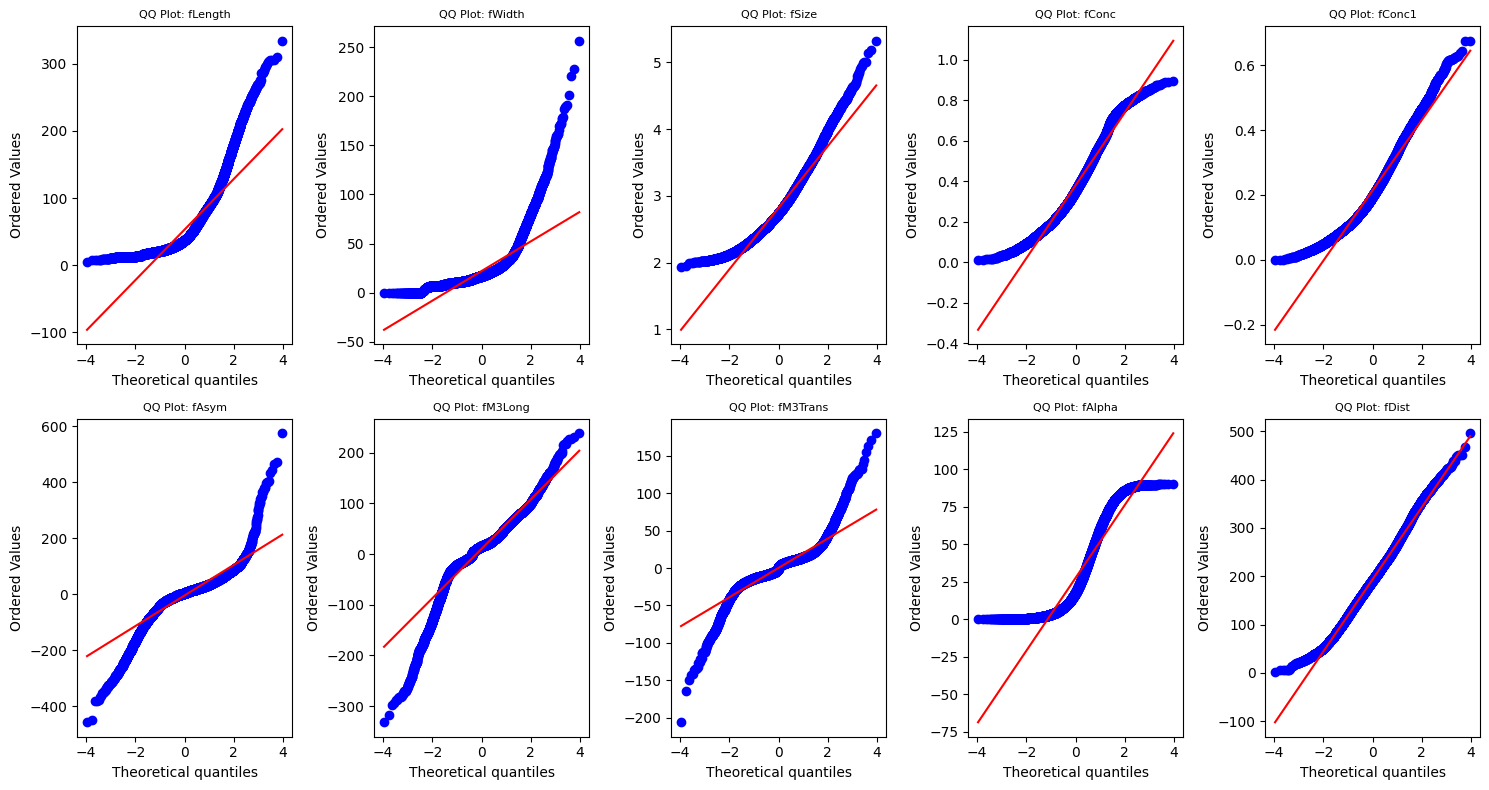

In [9]:
features = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']

fig, axes = plt.subplots(2, 5, figsize=(15,8))

for ax, feature in zip(axes.flatten(), features):
    stats.probplot(DS_feature[feature], dist="norm", plot=ax)
    ax.set_title(f"QQ Plot: {feature}", fontsize=8)

plt.tight_layout()
plt.show()

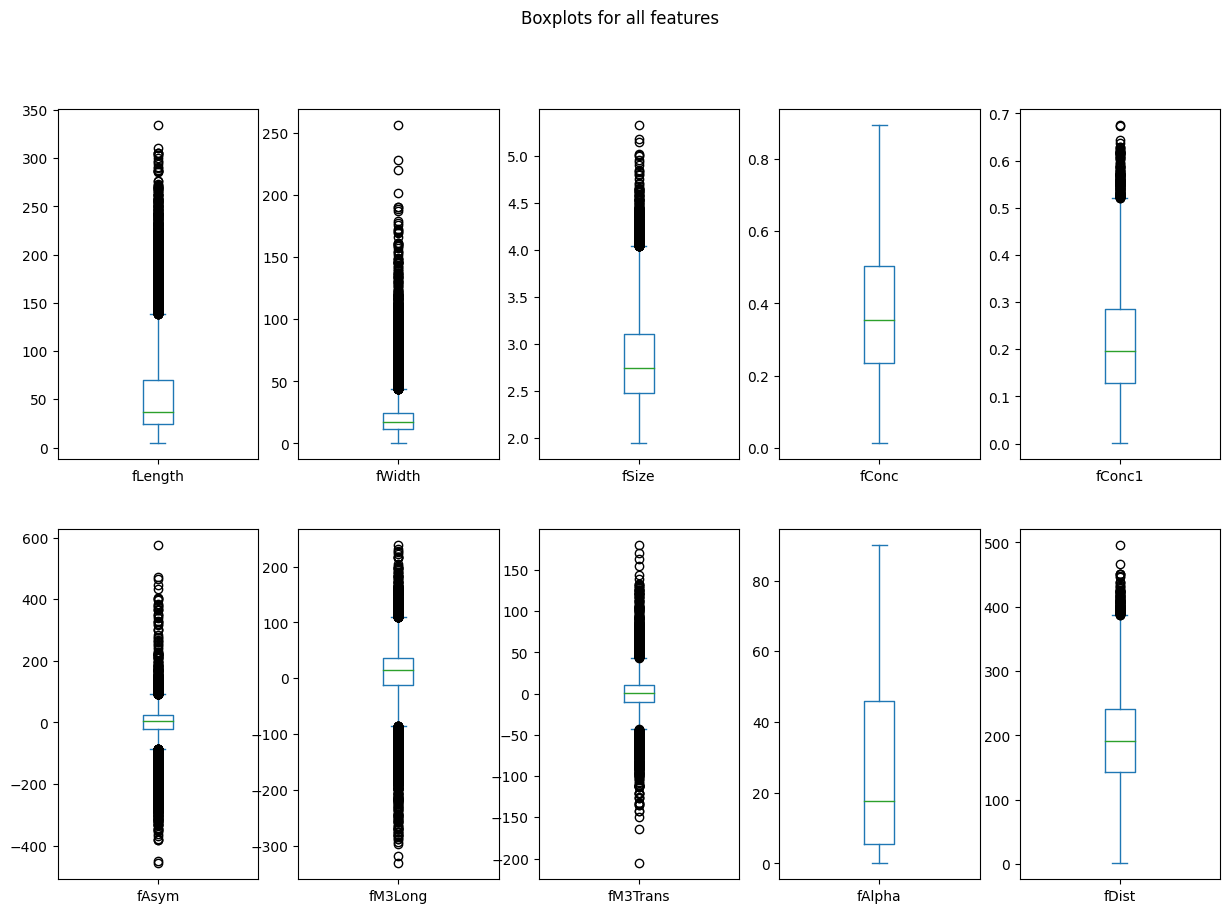

In [10]:
DS_feature.plot(kind='box', subplots=True,
                              layout=(2, 5), figsize=(15, 10), sharex=False)
plt.suptitle("Boxplots for all features")
plt.show()

In [11]:
features = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
for col in features:
    Q1 = DS_feature[col].quantile(0.25)
    Q3 = DS_feature[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_no_outliers = DS_feature[(DS_feature[col] >= lower) & (DS_feature[col] <= upper)]

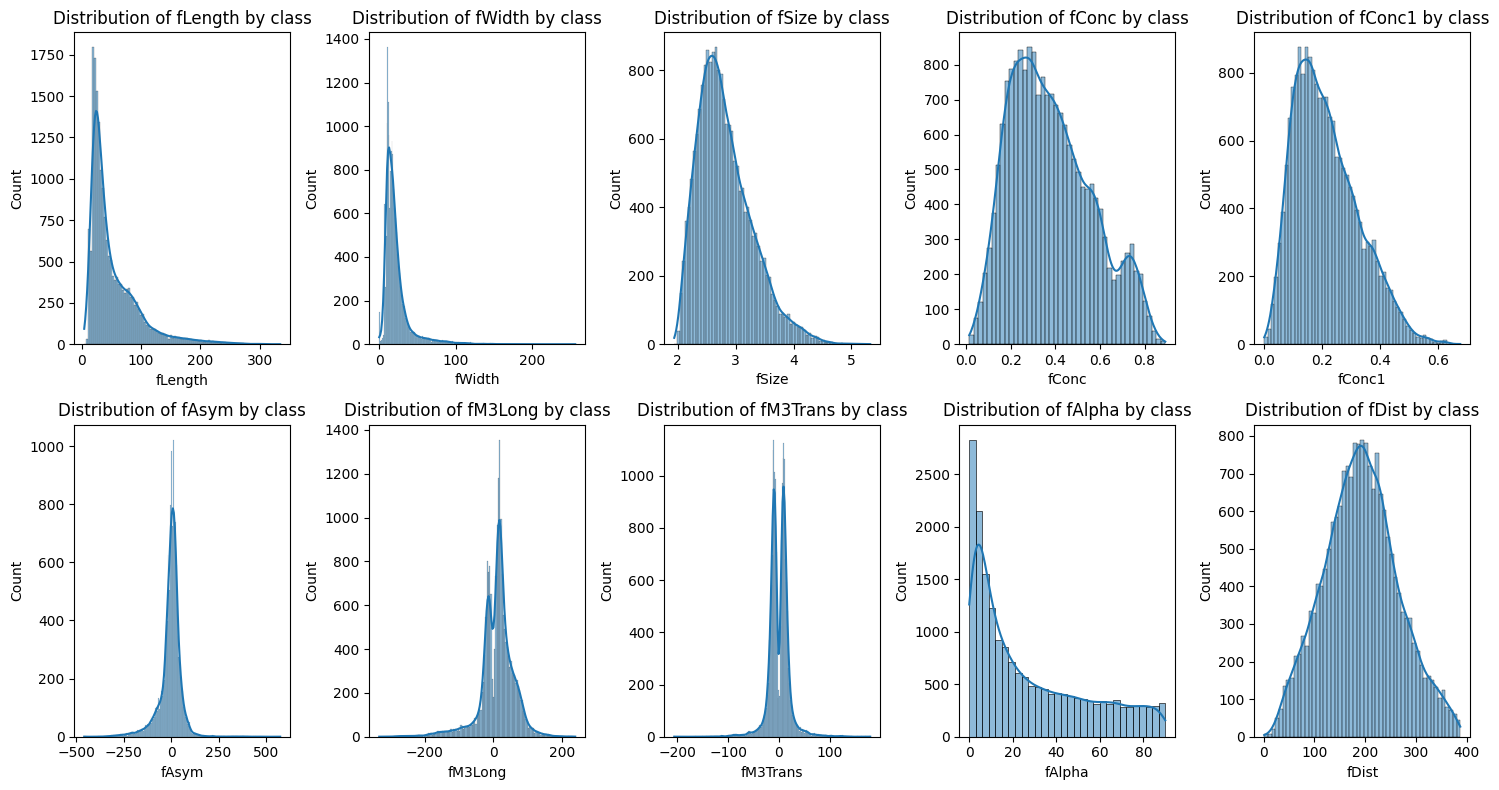

In [12]:
features = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']

fig, axes = plt.subplots(2, 5, figsize=(15,8))

for ax, feature in zip(axes.flatten(), features):
    sns.histplot(df_no_outliers[feature], kde=True, ax=ax)
    ax.set_title(f"Distribution of {feature} by class")


plt.tight_layout()
plt.show()

In [13]:
print(DS_feature.shape)
print(df_no_outliers.shape)

(19020, 10)
(18892, 10)


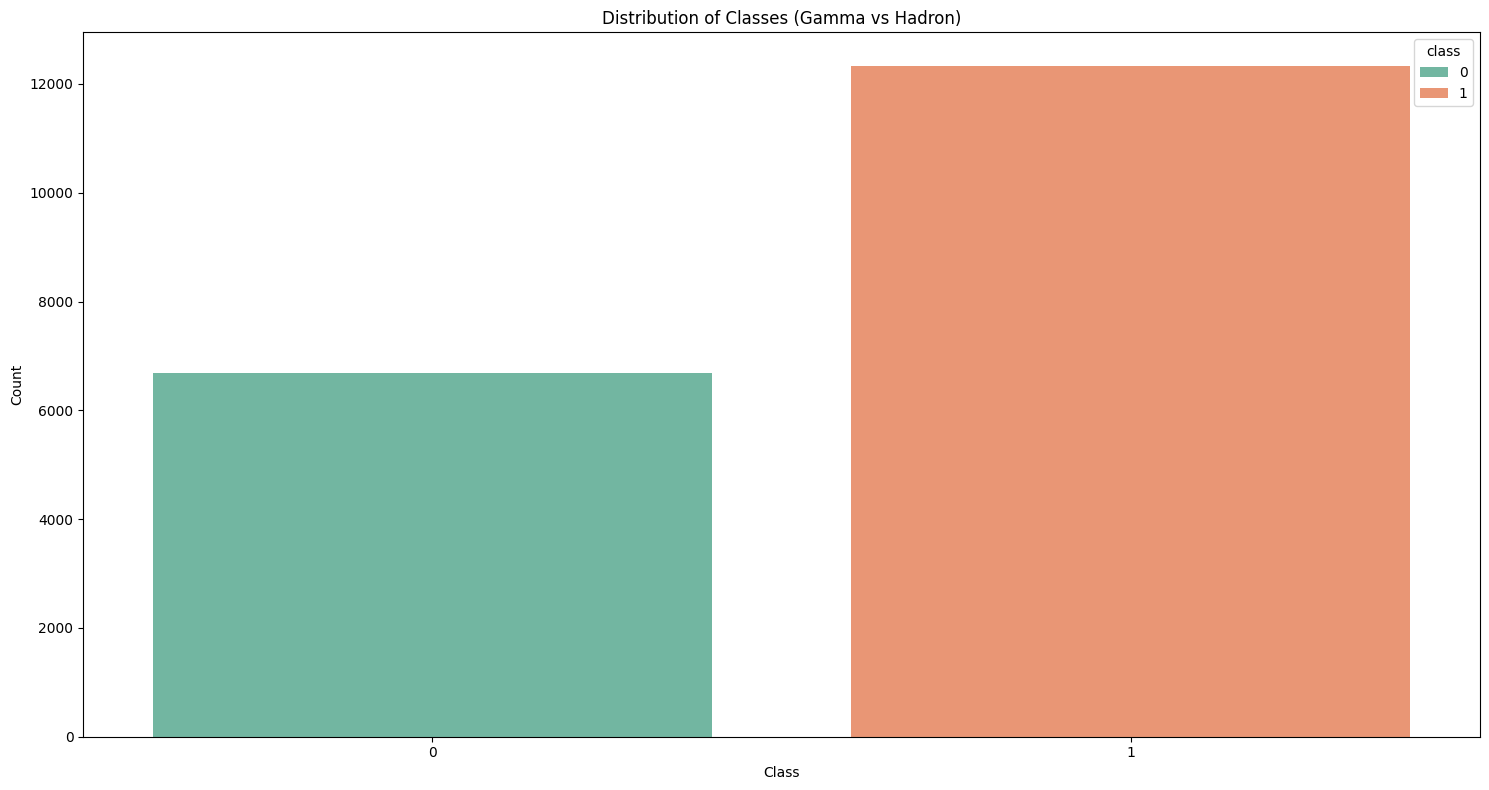

In [52]:
if df['class'].dtype == 'object':
    DS_target['class'] = DS_target['class'].map({'g': 1, 'h': 0})

plt.figure(figsize=(15, 8))
sns.countplot(x='class', data=DS_target, palette='Set2', hue='class')
plt.title("Distribution of Classes (Gamma vs Hadron)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

#DS_target['class'].value_counts()

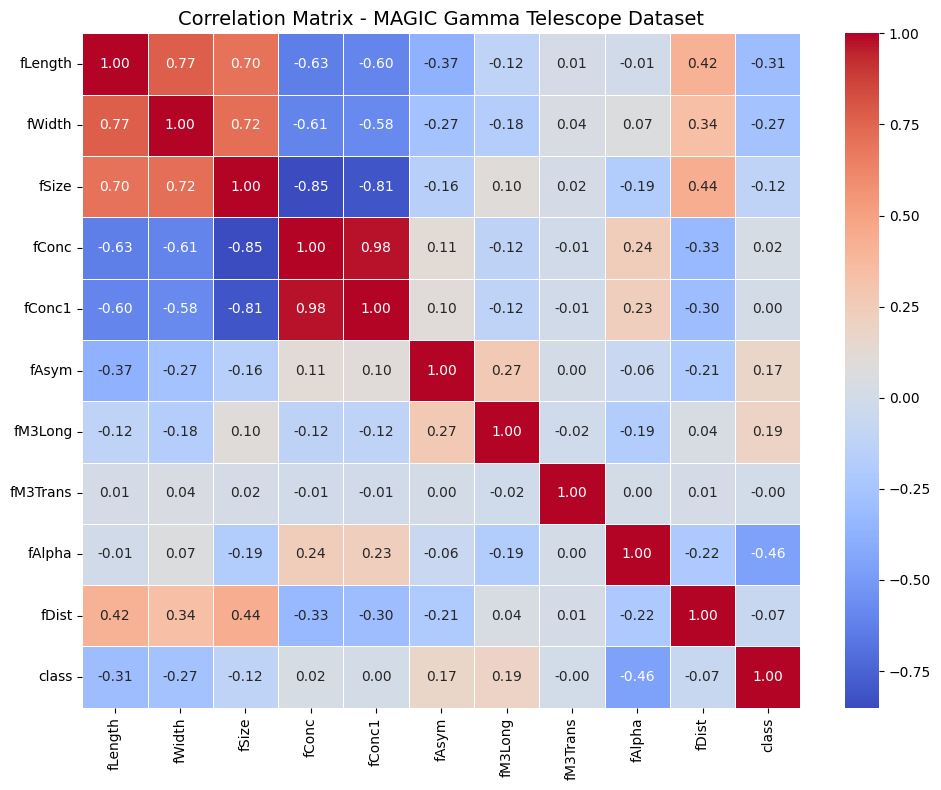

In [15]:
df = DS_feature.copy()
df['class'] = DS_target

df.drop_duplicates()

if df['class'].dtype == 'object':
    df['class'] = df['class'].map({'g': 1, 'h': 0})

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - MAGIC Gamma Telescope Dataset", fontsize=14)
plt.tight_layout()
plt.show()